In [1]:
import warnings
warnings.filterwarnings("ignore")

1.Data Undrstanding And Exploration

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("bike_sharing_data.csv")

In [4]:
df.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349


In [5]:
df.shape

(730, 16)

In [6]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [7]:
df.describe

<bound method NDFrame.describe of      instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  01-01-2018       1   0     1        0        6           0   
1          2  02-01-2018       1   0     1        0        0           0   
2          3  03-01-2018       1   0     1        0        1           1   
3          4  04-01-2018       1   0     1        0        2           1   
4          5  05-01-2018       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
725      726  27-12-2019       1   1    12        0        4           1   
726      727  28-12-2019       1   1    12        0        5           1   
727      728  29-12-2019       1   1    12        0        6           0   
728      729  30-12-2019       1   1    12        0        0           0   
729      730  31-12-2019       1   1    12        0        1           1   

     weathersit       temp     atemp      hum  windsp

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [9]:
#Assigning string values to different seasons instead of numeric values

#1 - Spring
df.loc[(df["season"] == 1),"season"] = "spring"

#2 - Summer
df.loc[(df["season"] == 2),"season"] = "summer"

#3 - Fall
df.loc[(df["season"] == 3),"season"] = "fall"

#4 - winter
df.loc[(df["season"] == 4),"season"] = "winter"

In [10]:
df["season"].astype("category").value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [11]:
df["yr"].astype("category").value_counts()

yr
0    365
1    365
Name: count, dtype: int64

In [12]:
#Assigning string values to different months instead of numeric values
def object_map_months(x) :
    return x.map({1 : 'Jan',2 : 'Feb',3 : 'Mar',4 : 'Apr',5 : 'May',6 : 'Jun',7 : 'Jul',8 : 'Aug',9 : 'Sep',10 : 'Oct',11 : 'Nov',12 : 'Dec'})

In [13]:
df[["mnth"]] = df[["mnth"]].apply(object_map_months)

In [14]:
df['mnth'].astype('category').value_counts()

mnth
Aug    62
Dec    62
Jul    62
Jan    62
Oct    62
May    62
Mar    62
Apr    60
Nov    60
Jun    60
Sep    60
Feb    56
Name: count, dtype: int64

In [15]:
df['holiday'].astype('category').value_counts()

holiday
0    709
1     21
Name: count, dtype: int64

In [16]:
def string_map_weekday(x) :
    return x.map({1 : 'Mon',2 : 'Tues',3 : 'Wed',4 : 'Thurs',5 : 'Fri',6 : 'Sat',0 : 'Sun'})

In [17]:
df[['weekday']] = df[['weekday']].apply(string_map_weekday)

In [18]:
df['weekday'].astype('category').value_counts()

weekday
Mon      105
Sat      105
Sun      105
Fri      104
Thurs    104
Tues     104
Wed      103
Name: count, dtype: int64

In [19]:
df['workingday'].astype('category').value_counts()

workingday
1    499
0    231
Name: count, dtype: int64

In [20]:
# 1 - Clear,few clouds,partly cloudy
df.loc[(df['weathersit'] == 1),'weathersit'] = 'A'

#2 - mist,cloudy
df.loc[(df['weathersit'] == 2),'weathersit'] = 'B'

# 3 - light snow,heavy rain
df.loc[(df['weathersit'] == 3),'weathersit'] = 'C'

In [21]:
df['weathersit'].astype('category').value_counts()

weathersit
A    463
B    246
C     21
Name: count, dtype: int64

 2. Data Visualisation

In [22]:
import matplotlib .pyplot as plt
import seaborn as sns

<Axes: xlabel='temp', ylabel='Density'>

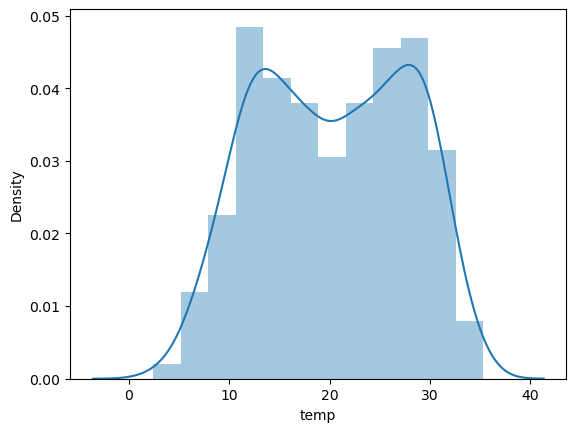

In [23]:
sns.distplot(df['temp'])

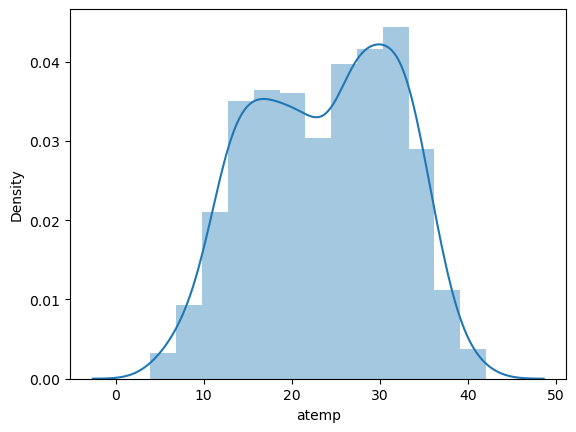

In [24]:
sns.distplot(df['atemp'])
plt.show()

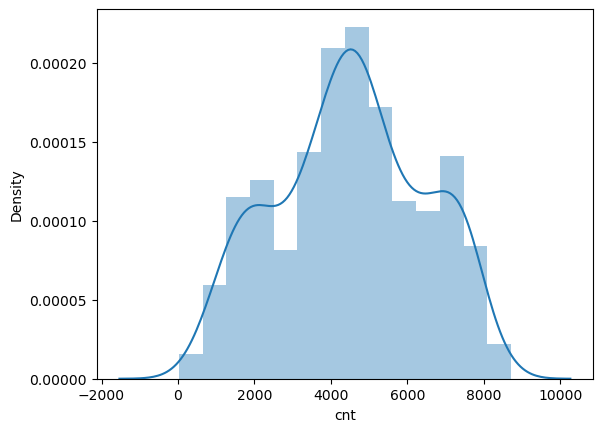

In [25]:
#Target variable : count of total rental bikes including both casual and registered
sns.distplot(df['cnt'])
plt.show()

In [26]:
#converting date into datetime format
df['dteday'] = df['dteday'].astype('datetime64[ns]')

In [27]:
df_categorical = df.select_dtypes(exclude=['float64','datetime64','Int64'])

In [28]:
df_categorical

,season,mnth,weekday,weathersit
0,spring,Jan,Sat,B
1,spring,Jan,Sun,B
2,spring,Jan,Mon,A
3,spring,Jan,Tues,A
4,spring,Jan,Wed,A
...,...,...,...,...
725,spring,Dec,Thurs,B
726,spring,Dec,Fri,B
727,spring,Dec,Sat,B
728,spring,Dec,Sun,A


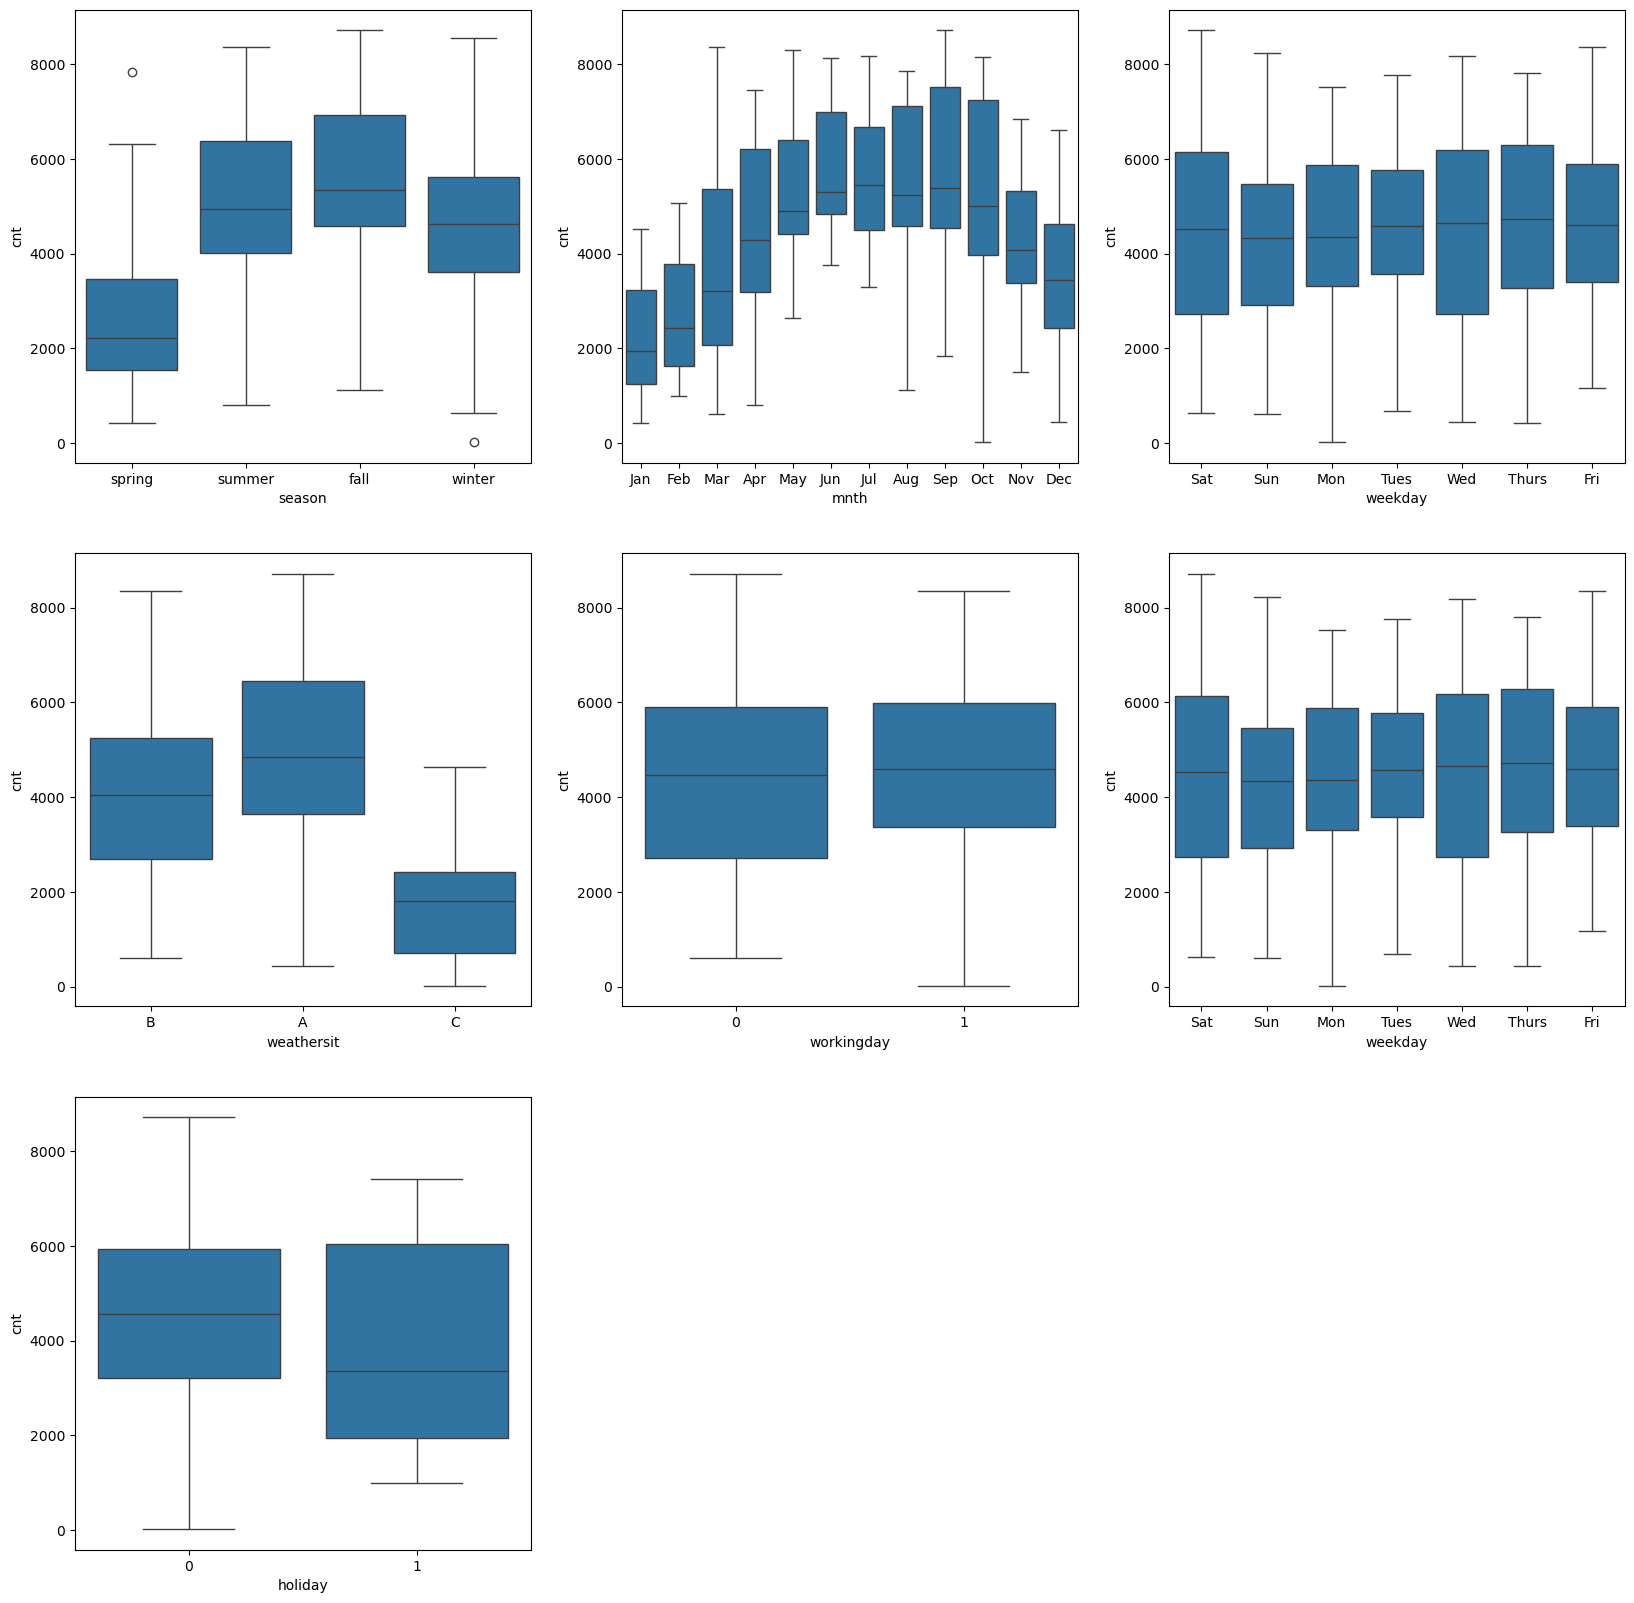

In [29]:
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x = 'season',y = 'cnt',data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'mnth',y = 'cnt',data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'weekday',y = 'cnt',data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit',y = 'cnt',data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'workingday',y = 'cnt',data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday',y = 'cnt',data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'holiday',y = 'cnt',data = df)
plt.show()

In [30]:
intVarlist = ["casual","registered","cnt"]

for var in intVarlist :
    df[var] = df[var].astype("float")

In [31]:
df_numeric = df.select_dtypes(include=['float64'])

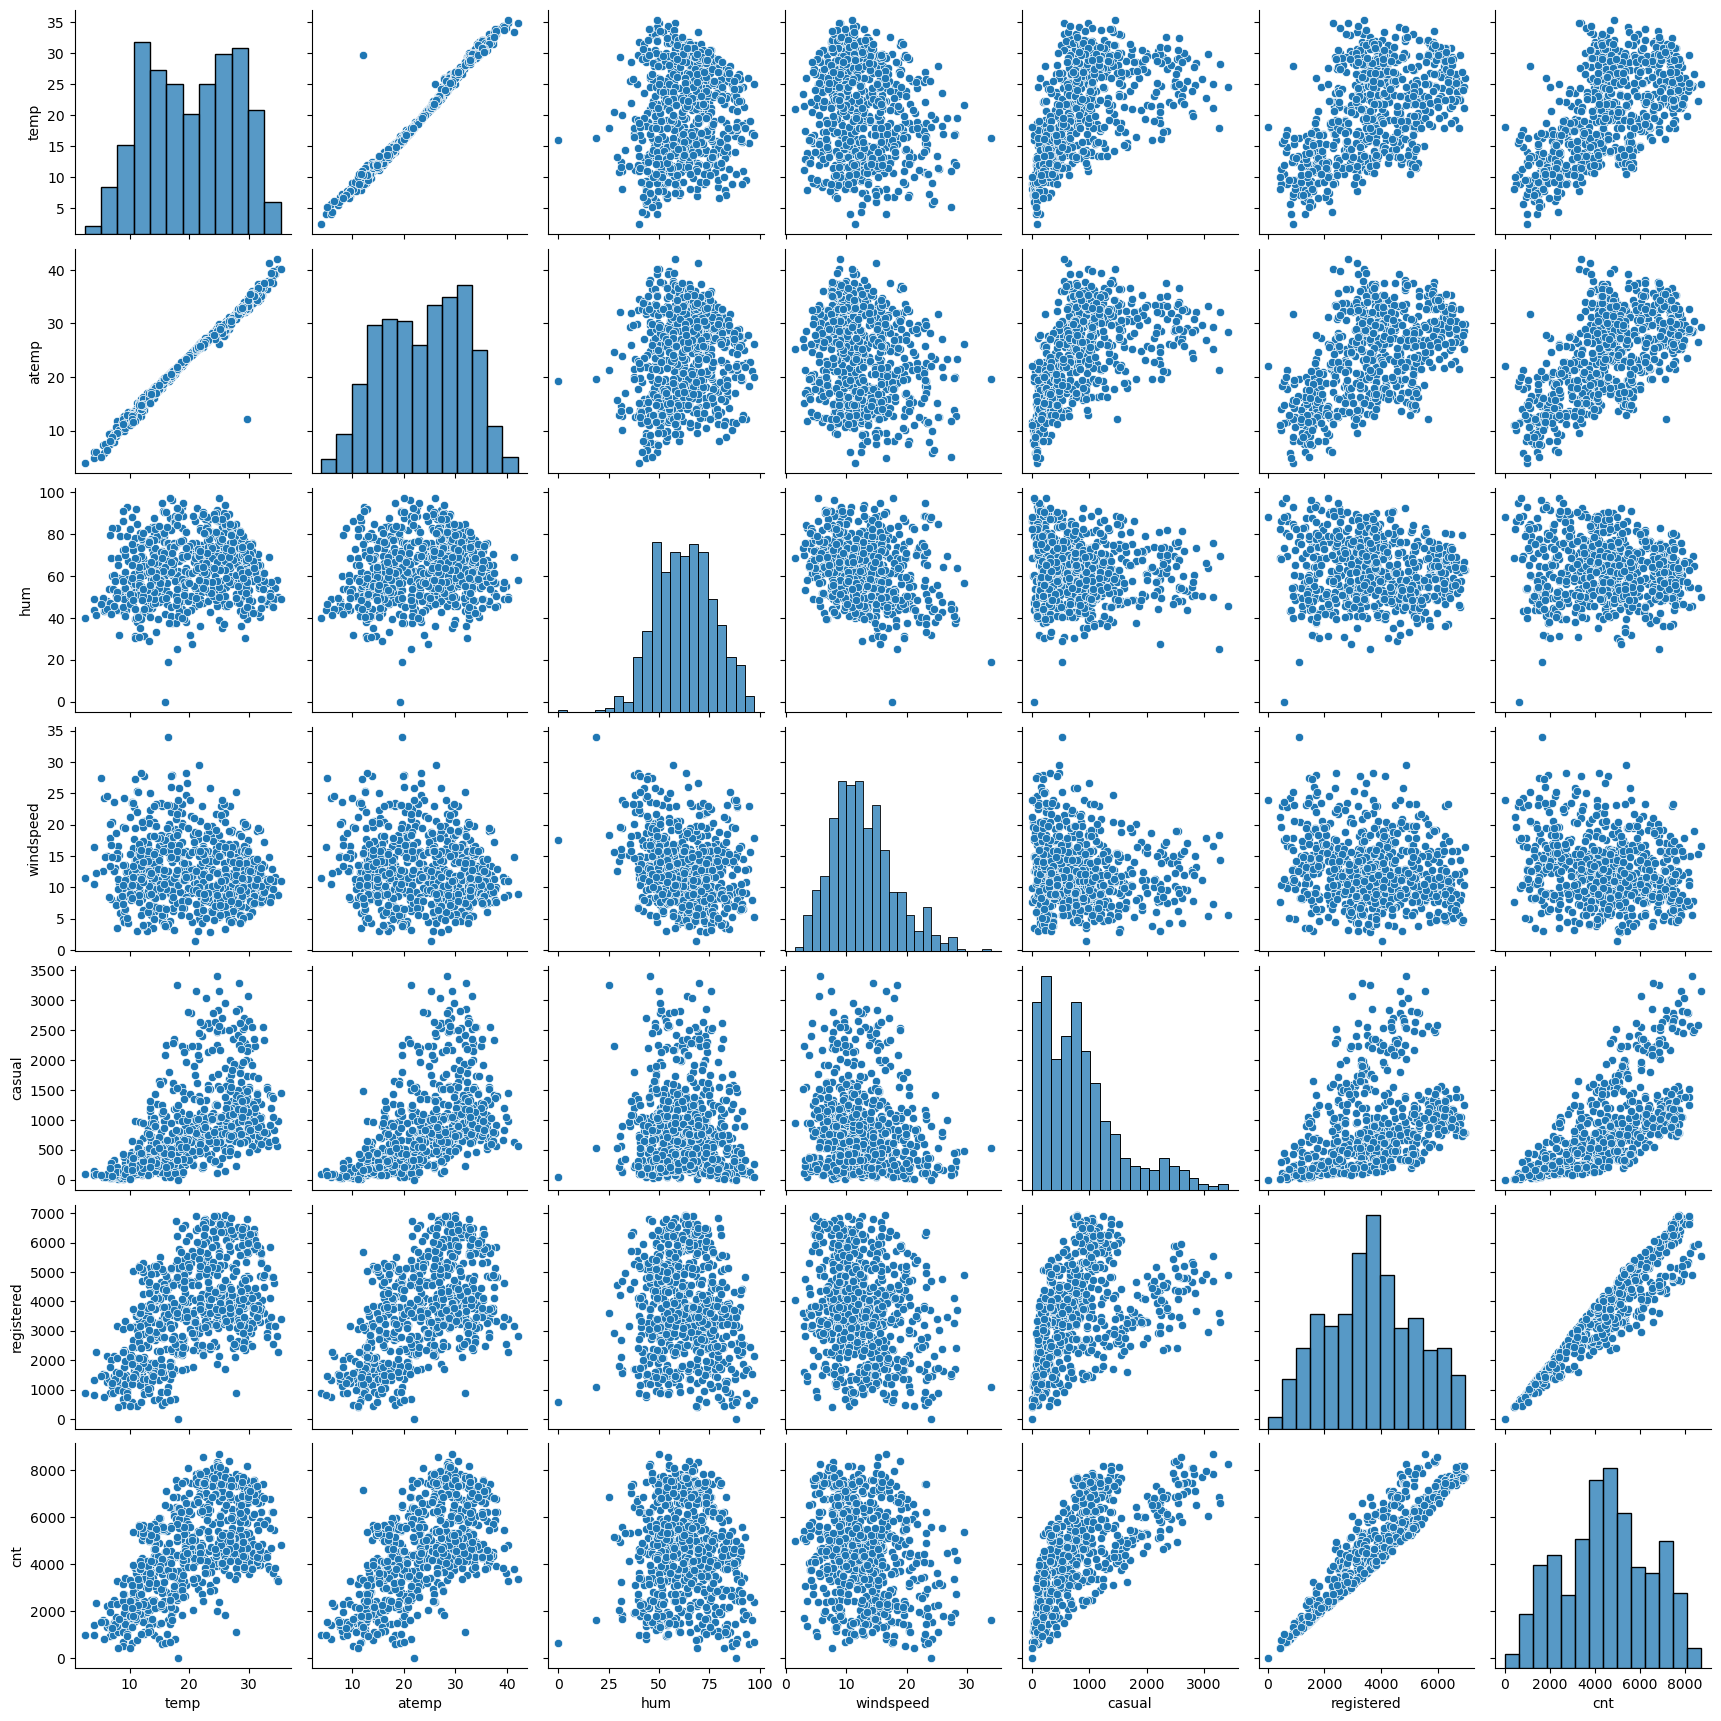

In [32]:
sns.pairplot(df_numeric)
plt.show()

In [33]:
cor = df_numeric.corr()

In [34]:
cor

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


In [35]:
#heatmap
#mask = np.array(cor)
#mask[np.tril_indices_from(mask)] = False
#fig, ax = plt.subplots()
#fig.set_size_inches(10,10)
#sns.heatmap(cor,vmax=1,square=True, annot=True)

 3. Data Preparation

In [36]:
df_categorical = df.select_dtypes(include=['object'])

In [37]:
df_dummies = pd.get_dummies(df_categorical,drop_first = True,dtype = int)
df_dummies = df_dummies.astype(int)
df_dummies.head(3)

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [38]:
df_categorical.head()

,season,mnth,weekday,weathersit
0,spring,Jan,Sat,B
1,spring,Jan,Sun,B
2,spring,Jan,Mon,A
3,spring,Jan,Tues,A
4,spring,Jan,Wed,A


In [39]:
# Drop categorical variable names
df = df.drop(list(df_categorical.columns),axis=1)

In [40]:
df = pd.concat([df,df_dummies],axis = 1)

In [41]:
df = df.drop(['instant' , 'dteday'],axis=1,inplace =False)

 4.Model Building and Evaluation 

In [42]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [43]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train,df_test = train_test_split(df,train_size = 0.7 , test_size = 0.3, random_state =100)

In [44]:
df_train

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
653,1,0,1,19.201653,23.04230,55.8333,12.208807,922.0,6612.0,7534.0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,29.246653,33.14480,70.4167,11.083475,968.0,6248.0,7216.0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,16.980847,20.67460,62.1250,10.792293,956.0,3110.0,4066.0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,10.489153,11.58500,48.3333,23.500518,364.0,1432.0,1796.0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,15.443347,18.87520,48.9583,8.708325,1120.0,3100.0,4220.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,29.554153,32.98605,58.7917,13.916771,1017.0,5647.0,6664.0,...,0,0,1,0,0,0,0,0,1,0
578,1,0,1,30.852500,35.35440,65.9583,8.666718,983.0,6278.0,7261.0,...,0,0,0,0,0,1,0,0,0,0
53,0,0,1,9.091299,12.28585,42.3043,6.305571,139.0,1778.0,1917.0,...,0,0,0,0,0,0,0,1,0,0
350,0,0,0,10.591653,12.46855,56.0833,16.292189,275.0,2464.0,2739.0,...,0,0,0,1,0,0,0,0,1,0


In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
scaler = MinMaxScaler()

In [47]:
var = ["temp","hum","windspeed","casual","registered","cnt"]

df_train[var] = scaler.fit_transform(df_train[var])

<Axes: >

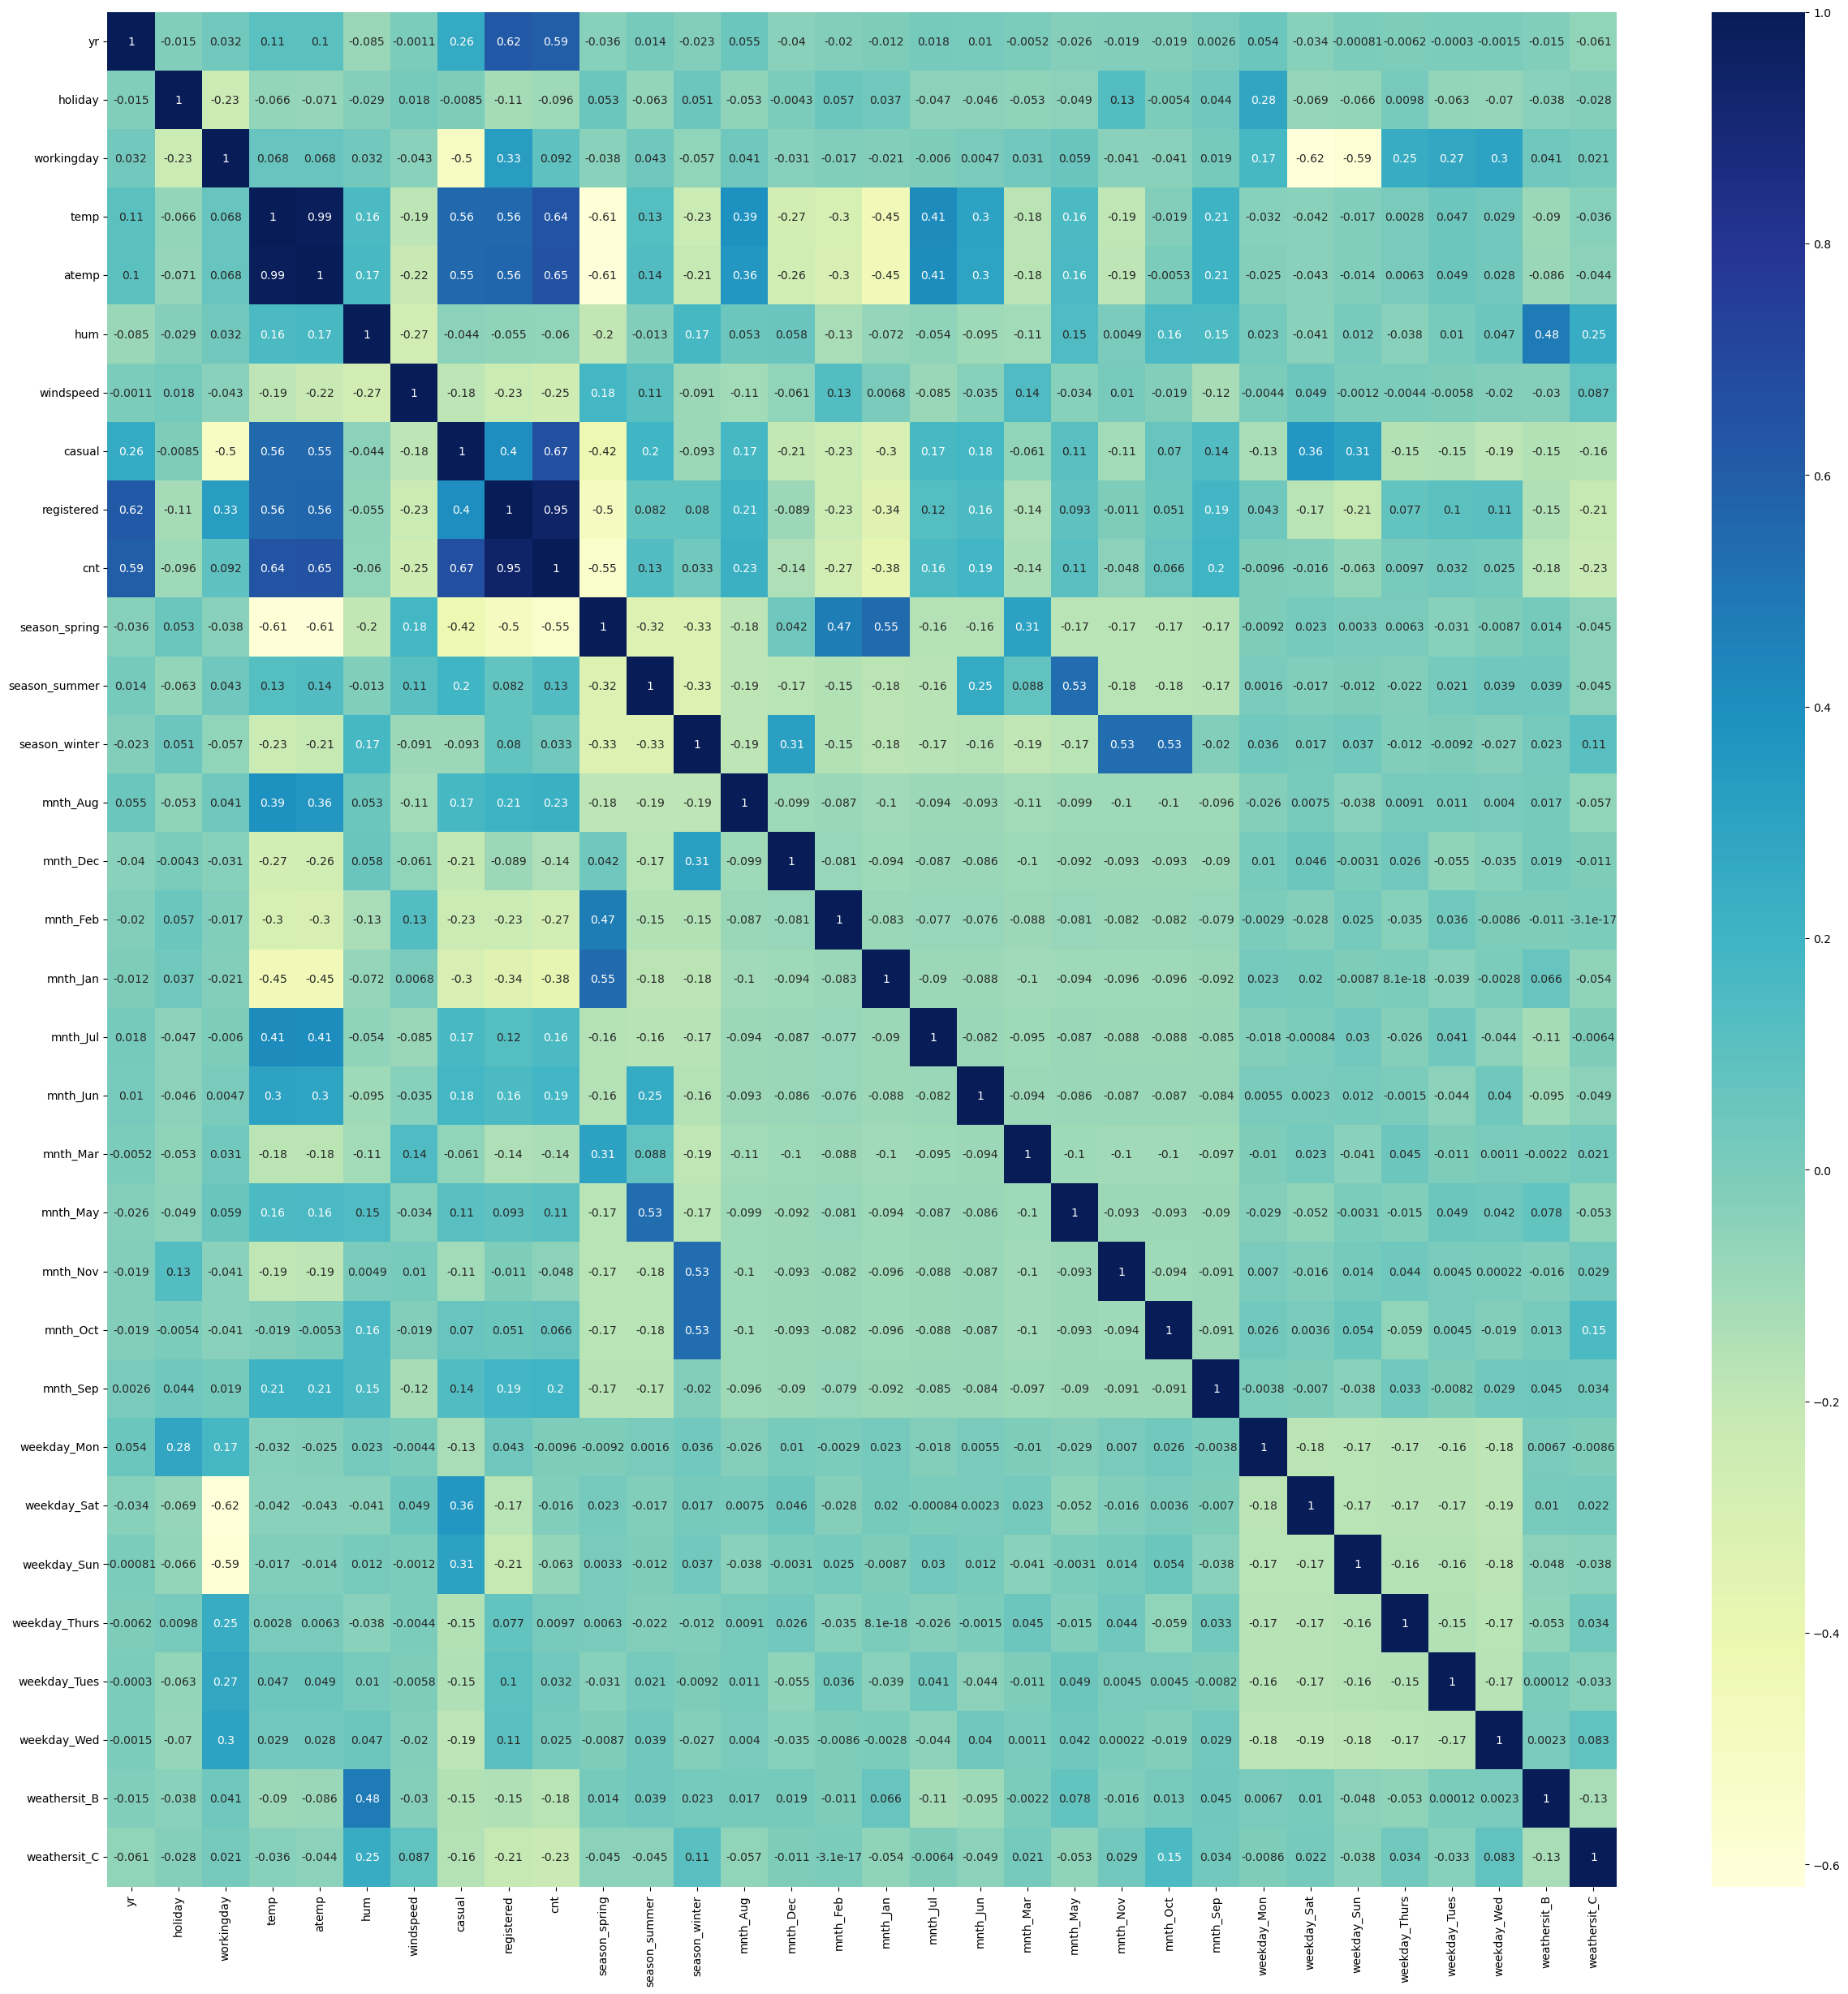

In [48]:
# checking the correlation coefficent to see which variables are highly correlated
plt.figure(figsize=(30,30)) 
sns.heatmap(df_train.corr(),annot =True,cmap="YlGnBu")

In [49]:
# Dividing into x and t

y_train = df_train.pop('cnt')
x_train = df_train.drop(['casual','registered'],axis =1)

In [50]:
x_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
653,1,0,1,0.509887,23.0423,0.575354,0.300794,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,33.1448,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,20.6746,0.640189,0.255342,1,0,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,0.245101,11.5850,0.498067,0.663106,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,18.8752,0.504508,0.188475,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [51]:
#x_train_bool = x_train.select_dtypes(include=['bool']).columns

In [52]:
#x_train[x_train_bool] = x_train[x_train_bool].astype('int64')

In [53]:
import statsmodels.api as sm
x_train_lm = sm.add_constant(x_train)

lr = sm.OLS(y_train, x_train_lm).fit()

In [54]:
lr.params

const            0.241033
yr               0.232208
holiday          0.009638
workingday       0.095911
temp             0.401322
atemp            0.001329
hum             -0.151812
windspeed       -0.184388
season_spring   -0.048580
season_summer    0.038216
season_winter    0.105387
mnth_Aug         0.016076
mnth_Dec        -0.045572
mnth_Feb        -0.032176
mnth_Jan        -0.062565
mnth_Jul        -0.039277
mnth_Jun        -0.001704
mnth_Mar         0.001288
mnth_May         0.024691
mnth_Nov        -0.041783
mnth_Oct         0.007695
mnth_Sep         0.081806
weekday_Mon     -0.021502
weekday_Sat      0.095008
weekday_Sun      0.040476
weekday_Thurs   -0.009750
weekday_Tues    -0.019308
weekday_Wed     -0.005733
weathersit_B    -0.061030
weathersit_C    -0.256697
dtype: float64

In [55]:
lm = LinearRegression()

In [56]:
lm.fit(x_train,y_train)

LinearRegression()

In [57]:
print(lm.coef_)
print(lm.intercept_)

[ 0.2322076  -0.0506203   0.0356525   0.40132173  0.00132911 -0.15181212
 -0.18438787 -0.04858014  0.03821569  0.10538739  0.01607601 -0.04557179
 -0.03217603 -0.06256549 -0.03927667 -0.00170354  0.00128797  0.02469107
 -0.0417827   0.00769492  0.08180574 -0.02150195  0.03475021 -0.01978241
 -0.00974981 -0.01930823 -0.00573276 -0.06103021 -0.25669709]
0.3012910797554355


In [58]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Thu, 23 Oct 2025   Prob (F-statistic):          8.42e-181
Time:                        22:44:04   Log-Likelihood:                 528.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     481   BIC:                            -875.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2410      0.037      6.521      0.000       0.168       0.314
yr                0.2322      0.008     28.792      0.000       0.216       0.248
holiday           0.0096      0.024      0.401      0.689      -0.038       0.057
workingday        0.0959      0.013      7.641      0.000       0.071       0.121
temp              0.4013      0.142      2.821      0.005       0.122       0.681
atemp             0.0013      0.004      0.366      0.714      -0.006       0.008
hum              -0.1518      0.039     -3.940      0.000      -0.228      -0.076
windspeed        -0.1844      0.026     -7.003      0.000      -0.236      -0.133
season_spring    -0.0486      0.030     -1.618      0.106      -0.108       0.010
season_summer     0.0382      0.026      1.455      0.146      -0.013       0.090
season_winter     0.1054      0.028      3.770      0.000       0.050       0.160
mnth_Aug          0.0161      0.034      0.473      0.637      -0.051       0.083
mnth_Dec         -0.0456      0.034     -1.356      0.176      -0.112       0.020
mnth_Feb         -0.0322      0.033     -0.978      0.329      -0.097       0.032
mnth_Jan         -0.0626      0.034     -1.864      0.063      -0.129       0.003
mnth_Jul         -0.0393      0.035     -1.116      0.265      -0.108       0.030
mnth_Jun         -0.0017      0.025     -0.067      0.946      -0.051       0.048
mnth_Mar          0.0013      0.025      0.052      0.958      -0.047       0.050
mnth_May          0.0247      0.021      1.169      0.243      -0.017       0.066
mnth_Nov         -0.0418      0.036     -1.149      0.251      -0.113       0.030
mnth_Oct          0.0077      0.036      0.215      0.830      -0.063       0.078
mnth_Sep          0.0818      0.032      2.549      0.011       0.019       0.145
weekday_Mon      -0.0215      0.015     -1.395      0.164      -0.052       0.009
weekday_Sat       0.0950      0.014      6.675      0.000       0.067       0.123
weekday_Sun       0.0405      0.014      2.804      0.005       0.012       0.069
weekday_Thurs    -0.0097      0.016     -0.625      0.532      -0.040       0.021
weekday_Tues     -0.0193      0.016     -1.242      0.215      -0.050       0.011
weekday_Wed      -0.0057      0.015     -0.384      0.701      -0.035       0.024
weathersit_B     -0.0610      0.010     -5.845      0.000      -0.082      -0.041
weathersit_C     -0.2567      0.026     -9.712      0.000      -0.309      -0.205
==============================================================================
Omnibus:                       85.143   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              237.880
Skew:                          -0.809   Prob(JB):                     2.21e-52
Kurtosis:                       5.929   Cond. No.            

In [59]:
from sklearn.feature_selection import RFE

In [60]:
lm = LinearRegression()
rfe1 = RFE(estimator=lm, n_features_to_select=15)
rfe1.fit(x_train,y_train)
print(rfe1.support_)
print(rfe1.ranking_)

[ True  True  True  True False  True  True  True  True  True False False
 False  True  True False False False False False  True False  True False
 False False False  True  True]
[ 1  1  1  1 14  1  1  1  1  1  6  3  4  1  1 13 15  5  2 10  1  8  1  7
 11  9 12  1  1]


In [61]:
col1 = x_train.columns[rfe1.support_]

In [62]:
x_train_rfe1 = x_train[col1]
x_train_rfe1 = sm.add_constant(x_train_rfe1)
lm1 = sm.OLS(y_train, x_train_rfe1).fit()
lm1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Thu, 23 Oct 2025   Prob (F-statistic):          2.31e-191
Time:                        22:44:04   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2510      0.036      6.949      0.000       0.180       0.322
yr                0.2305      0.008     28.807      0.000       0.215       0.246
holiday          -0.0585      0.027     -2.178      0.030      -0.111      -0.006
workingday        0.0435      0.012      3.781      0.000       0.021       0.066
temp              0.5098      0.034     14.851      0.000       0.442       0.577
hum              -0.1547      0.037     -4.145      0.000      -0.228      -0.081
windspeed        -0.1860      0.025     -7.301      0.000      -0.236      -0.136
season_spring    -0.0508      0.021     -2.461      0.014      -0.091      -0.010
season_summer     0.0497      0.015      3.346      0.001       0.020       0.079
season_winter     0.0944      0.017      5.479      0.000       0.061       0.128
mnth_Jan         -0.0343      0.017     -1.980      0.048      -0.068      -0.000
mnth_Jul         -0.0532      0.018     -2.947      0.003      -0.089      -0.018
mnth_Sep          0.0812      0.016      4.934      0.000       0.049       0.114
weekday_Sat       0.0537      0.014      3.707      0.000       0.025       0.082
weathersit_B     -0.0578      0.010     -5.574      0.000      -0.078      -0.037
weathersit_C     -0.2488      0.026     -9.560      0.000      -0.300      -0.198
==============================================================================
Omnibus:                       66.344   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.565
Skew:                          -0.676   Prob(JB):                     8.25e-36
Kurtosis:                       5.403   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [64]:
a = x_train_rfe1.drop('const', axis=1)

In [65]:
vif = pd.DataFrame()
vif['features'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values,i) for i in range(a.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,features,VIF
4,hum,29.40
3,temp,17.77
2,workingday,5.31
5,windspeed,4.73
6,season_spring,4.53
8,season_winter,3.48
7,season_summer,2.84
13,weathersit_B,2.29
0,yr,2.09
12,weekday_Sat,1.98


In [66]:
lm = LinearRegression()
rfe2 = RFE(estimator=lm, n_features_to_select=15)
rfe2.fit(x_train,y_train)
print(rfe2.support_)
print(rfe2.ranking_)

[ True  True  True  True False  True  True  True  True  True False False
 False  True  True False False False False False  True False  True False
 False False False  True  True]
[ 1  1  1  1 14  1  1  1  1  1  6  3  4  1  1 13 15  5  2 10  1  8  1  7
 11  9 12  1  1]


In [67]:
col2 = x_train.columns[rfe2.support_]

x_train_rfe2 = x_train[col2]
x_train_rfe2 = sm.add_constant(x_train_rfe2)
lm2 = sm.OLS(y_train, x_train_rfe2).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Thu, 23 Oct 2025   Prob (F-statistic):          2.31e-191
Time:                        22:44:05   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2510      0.036      6.949      0.000       0.180       0.322
yr                0.2305      0.008     28.807      0.000       0.215       0.246
holiday          -0.0585      0.027     -2.178      0.030      -0.111      -0.006
workingday        0.0435      0.012      3.781      0.000       0.021       0.066
temp              0.5098      0.034     14.851      0.000       0.442       0.577
hum              -0.1547      0.037     -4.145      0.000      -0.228      -0.081
windspeed        -0.1860      0.025     -7.301      0.000      -0.236      -0.136
season_spring    -0.0508      0.021     -2.461      0.014      -0.091      -0.010
season_summer     0.0497      0.015      3.346      0.001       0.020       0.079
season_winter     0.0944      0.017      5.479      0.000       0.061       0.128
mnth_Jan         -0.0343      0.017     -1.980      0.048      -0.068      -0.000
mnth_Jul         -0.0532      0.018     -2.947      0.003      -0.089      -0.018
mnth_Sep          0.0812      0.016      4.934      0.000       0.049       0.114
weekday_Sat       0.0537      0.014      3.707      0.000       0.025       0.082
weathersit_B     -0.0578      0.010     -5.574      0.000      -0.078      -0.037
weathersit_C     -0.2488      0.026     -9.560      0.000      -0.300      -0.198
==============================================================================
Omnibus:                       66.344   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.565
Skew:                          -0.676   Prob(JB):                     8.25e-36
Kurtosis:                       5.403   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
b = x_train_rfe2.drop(columns=['const'],axis=1 )
vif1 = pd.DataFrame()
vif1['features'] = b.columns
vif1['VIF'] = [variance_inflation_factor(b.values,i) for i in range(b.shape[1])]
vif1['VIF'] = round(vif1['VIF'],2)
vif1 = vif1.sort_values(by = 'VIF',ascending = False)
vif1

,features,VIF
4,hum,29.40
3,temp,17.77
2,workingday,5.31
5,windspeed,4.73
6,season_spring,4.53
8,season_winter,3.48
7,season_summer,2.84
13,weathersit_B,2.29
0,yr,2.09
12,weekday_Sat,1.98


In [69]:
y_train_cnt = lm2.predict(x_train_rfe2)

<Axes: ylabel='Density'>

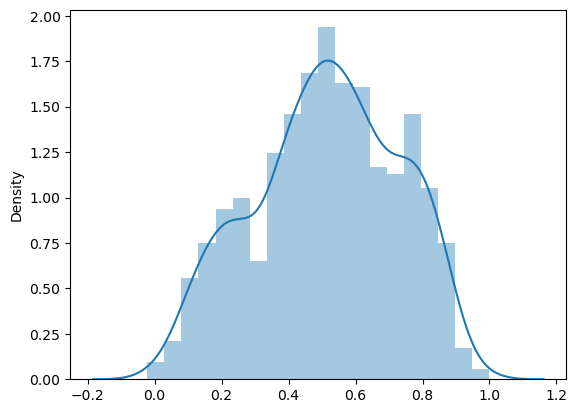

In [70]:
fig = plt.figure()
sns.distplot((y_train, y_train_cnt), bins=20)

In [71]:
df_test[var] = scaler.transform(df_test[var])

In [72]:
y_test = df_test.pop('cnt')
x_test = df_test.drop(['casual', 'registered'], axis=1)

In [73]:
c = x_train_rfe2.drop('const',axis=1)

In [74]:
col2 = c.columns

In [75]:
valid_cols = [col for col in col2 if col in x_test.columns]
x_test_rfe2 = x_test[valid_cols]

In [76]:
x_test_rfe2 = sm.add_constant(x_test_rfe2)

In [77]:
x_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   const          219 non-null    float64
 1   yr             219 non-null    int64  
 2   holiday        219 non-null    int64  
 3   workingday     219 non-null    int64  
 4   temp           219 non-null    float64
 5   hum            219 non-null    float64
 6   windspeed      219 non-null    float64
 7   season_spring  219 non-null    int64  
 8   season_summer  219 non-null    int64  
 9   season_winter  219 non-null    int64  
 10  mnth_Jan       219 non-null    int64  
 11  mnth_Jul       219 non-null    int64  
 12  mnth_Sep       219 non-null    int64  
 13  weekday_Sat    219 non-null    int64  
 14  weathersit_B   219 non-null    int64  
 15  weathersit_C   219 non-null    int64  
dtypes: float64(4), int64(12)
memory usage: 29.1 KB


In [78]:

y_pred = lm2.predict(x_test_rfe2)

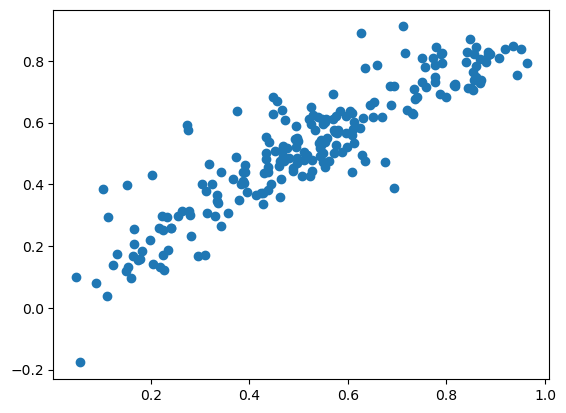

In [79]:
plt.figure()
plt.scatter(y_test, y_pred)

In [80]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8143237268519431